# **HW2: Decision Tree** 
In *assignment 2*, you need to:

1.   Implement the decision tree in 3 steps (with the example data)


*   Step 1: calculate the entropy
*   Step 2: search for the best split
*   Step 3: build the decision tree

2.   Predict the patients' death (hospDIED) in the *MIMIC* dataset

Please fill in your **studentID** here.

In [87]:
STUDENT_ID = 'STUDENT_ID'

# **1. Implement the Decision Tree**
In the first part, you need to implement the decision tree by completing the given funcitions.

Also, you need to run those functions with given input variables and save the output to the implementation csv file **[STUDENT_ID]_implementation.csv**.

Implement a binary decision tree to classify *Restaurant* dataset.

## Import Packages

Note: You **cannot** import any other packages in the first part (implementation)!

In [88]:
import numpy as np
import pandas as pd
import random

## Load the Example Data
First, load the *Restaurant waiting* dataset: **data.csv**

In [89]:
example = pd.read_csv('https://raw.githubusercontent.com/aubreyyy24/HW2_data/main/data.csv')
example

,Unnamed: 0,Alternate,Bar,Friday,Hungry,Patrons,Price,Raining,Reservation,Type,WaitEstimate,Wait
0,X1,T,F,F,T,Some,High,F,T,French,8,T
1,X2,T,F,F,T,Full,Low,F,F,Thai,40,F
2,X3,F,T,F,F,Some,Low,F,F,Burger,8,T
3,X4,T,F,T,T,Full,Low,F,F,Thai,12,T
4,X5,T,F,T,F,Full,High,F,T,French,70,F
5,X6,F,T,F,T,Some,Medium,T,T,Italian,3,T
6,X7,F,T,F,F,None,Low,T,F,Burger,7,F
7,X8,F,F,F,T,Some,Medium,T,T,Thai,6,T
8,X9,F,T,T,F,Full,Low,T,F,Burger,80,F
9,X10,T,T,T,T,Full,High,F,T,Italian,20,F


In [90]:
example = example.drop(['Unnamed: 0'], axis=1)

In [91]:
# change the string categorical to integer labels
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

example['Alternate'] = labelencoder.fit_transform(example['Alternate'])
example['Bar'] = labelencoder.fit_transform(example['Bar'])
example['Friday'] = labelencoder.fit_transform(example['Friday'])
example['Hungry'] = labelencoder.fit_transform(example['Hungry'])
example['Patrons'] = labelencoder.fit_transform(example['Patrons'])
example['Price'] = labelencoder.fit_transform(example['Price'])
example['Raining'] = labelencoder.fit_transform(example['Raining'])
example['Reservation'] = labelencoder.fit_transform(example['Reservation'])
example['Type'] = labelencoder.fit_transform(example['Type'])

example

,Alternate,Bar,Friday,Hungry,Patrons,Price,Raining,Reservation,Type,WaitEstimate,Wait
0,1,0,0,1,2,0,0,1,1,8,T
1,1,0,0,1,0,1,0,0,3,40,F
2,0,1,0,0,2,1,0,0,0,8,T
3,1,0,1,1,0,1,0,0,3,12,T
4,1,0,1,0,0,0,0,1,1,70,F
5,0,1,0,1,2,2,1,1,2,3,T
6,0,1,0,0,1,1,1,0,0,7,F
7,0,0,0,1,2,2,1,1,3,6,T
8,0,1,1,0,0,1,1,0,0,80,F
9,1,1,1,1,0,0,0,1,2,20,F


## Calculating the Entropy *(20%)*


In [92]:
# split the data by given attribute and its threshold
def partition(data, column, threshold):
  """
  The *partition* function will split the input data into 2 branches.
    args:
    *   data(DataFrame): the input data
    *   column(str): the attribute(column name)
    *   threshold(float): the column's threshold for splitting the data
    returns:
    *   match_branch(DataFrame): the divided data that matches the assigned column's threshold
    *   false_branch(DataFrame): the divided data that doesn't match the assigned column's threshold
  """
  match_branch_init = {
    "Alternate":[],	
    "Bar":[],	
    "Friday":[],	
    "Hungry":[],	
    "Patrons":[],	
    "Price":[],	
    "Raining":[],	
    "Reservation":[],	
    "Type":[],	
    "WaitEstimate":[],	
    "Wait":[],
  }
  match_branch = pd.DataFrame(match_branch_init)

  false_branch_init = {
    "Alternate":[],	
    "Bar":[],	
    "Friday":[],	
    "Hungry":[],	
    "Patrons":[],	
    "Price":[],	
    "Raining":[],	
    "Reservation":[],	
    "Type":[],	
    "WaitEstimate":[],	
    "Wait":[],
  }
  false_branch = pd.DataFrame(false_branch_init)

  for i in range(0,len(data)):
    if data[column][i] <= threshold:
      match_branch=match_branch.append(data.T[i],ignore_index=True)
    else:
      false_branch = false_branch.append(data.T[i],ignore_index=True)
      
  return match_branch, false_branch

If we try *partition(example, 'Patrons', 1.5)*:

split example to 

match_left(Patrons<= 1.5) (Patrons != Some) and  
false_right(Patrons > 1.5) (Patrons == Some)

column: Patrons, threshold: 1.5



In [93]:
match_left, false_right = partition(example, 'Patrons', 1.5)
print(match_left.shape)
print(false_right.shape)
match_left.head()

(8, 11)
(4, 11)


,Alternate,Bar,Friday,Hungry,Patrons,Price,Raining,Reservation,Type,WaitEstimate,Wait
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,40.0,F
1,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0,12.0,T
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,70.0,F
3,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,7.0,F
4,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,80.0,F


In [94]:
def entropy(data):
  """
  The *entropy* function will calculate the entropy of the node(data)
  args:
  *    data(DataFrame): the data you're calculating for the entropy
  output:
  *    entropy(float): the node(data)'s entropy     
  """
  count_T = 0
  count_F = 0
  for i in range(0,len(data)):
    if data['Wait'][i] == 'T':
      count_T+=1
    elif data['Wait'][i] == 'F':
      count_F+=1
  if count_T== 0 or count_F == 0:
    return 0
  p = count_T/len(data)
  log_p = np.log2(p)
  q = count_F/len(data)
  log_q = np.log2(q)
  entropy = (-1)*(p*log_p + q*log_q)
  return entropy

An example of the output from entropy (Use this to check if your output is correct): 

In [95]:
match, false = partition(example, 'Hungry', 0.5)
entropy1 = entropy(match)
print(entropy1)

0.7219280948873623


In [96]:
#implementation 1: calculate the entropy of 'false_right' data
ans_entropy = entropy(false)

## Find the Best Split *(20%)*

In [97]:
# search for the best attribute and the value(threshold) to split the data
def findBestSplit(data):
    """
    The *findBestSplit* function finds the best combination of attribute and value(with the largest reduction in entropy) to split the data.
    args:
    *   data(DataFrame): the data you try to split(build the decision tree)
    output:
    *   column_best(str): the attribute(column) split with the largest reduction in entropy
    *   value_best(float): the value(threshold) of the column_best attribute to split the data
    """
    all_entropy = 9999        #the overall entropy : save the value of the smallest entropy
    column_best = 0
    value_best = 0

    N = len(example)

    A_match, A_false = partition(data, 'Alternate', 0.5)
    Alternate_entropy = (len(A_match)/N)*entropy(A_match) + (len(A_false)/N)*entropy(A_false)

    if Alternate_entropy < all_entropy:
        all_entropy = Alternate_entropy
        column_best = 'Alternate'
        value_best = 0.5
        if all_entropy == 0:
            return column_best, value_best
    
    #  Bar
    Bar_match, Bar_false = partition(data, 'Bar', 0.5)
    Bar_entropy = (len(Bar_match)/N)*entropy(Bar_match) + (len(Bar_false)/N)*entropy(Bar_false)
    if Bar_entropy < all_entropy:
        column_best = 'Bar'
        value_best = 0.5
        all_entropy = Bar_entropy
        if all_entropy == 0:
            return column_best, value_best

    #  Friday
    Friday_match, Friday_false = partition(data, 'Friday', 0.5)
    Friday_entropy = (len(Friday_match)/N)*entropy(Friday_match) + (len(Friday_false)/N)*entropy(Friday_false)
    if Friday_entropy < all_entropy:
        column_best = 'Friday'
        value_best = 0.5
        all_entropy = Friday_entropy        
        if all_entropy == 0:
            return column_best, value_best
    
    #  Hungry
    Hungry_match, Hungry_false = partition(data, 'Hungry', 0.5)
    Hungry_entropy = (len(Hungry_match)/N)*entropy(Hungry_match) + (len(Hungry_false)/N)*entropy(Hungry_false)
    if Hungry_entropy < all_entropy:
        column_best = 'Hungry'
        value_best = 0.5
        all_entropy = Hungry_entropy        
        if all_entropy == 0:
            return column_best, value_best
    
    #  Patrons
    Patrons_match, Patrons_false = partition(data, 'Patrons', 1.5)
    Patrons_entropy = (len(Patrons_match)/N)*entropy(Patrons_match) + (len(Patrons_false)/N)*entropy(Patrons_false)
    if Patrons_entropy < all_entropy:
        column_best = 'Patrons'
        value_best = 1.5
        all_entropy = Patrons_entropy        
        if all_entropy == 0:
            return column_best, value_best
   
    #  Price
    Price_match, Price_false = partition(data, 'Price', 1.5)
    Price_entropy = (len(Price_match)/N)*entropy(Price_match) + (len(Price_false)/N)*entropy(Price_false)
    if Price_entropy < all_entropy:
        column_best = 'Price'
        value_best = 1.5  
        all_entropy = Price_entropy        
        if all_entropy == 0:
            return column_best, value_best
    
    #  Raining
    Raining_match, Raining_false = partition(data, 'Raining', 0.5)
    Raining_entropy = (len(Raining_match)/N)*entropy(Raining_match) + (len(Raining_false)/N)*entropy(Raining_false)
    if Raining_entropy < all_entropy:
        column_best = 'Raining'
        value_best = 0.5
        all_entropy = Raining_entropy        
        if all_entropy == 0:
            return column_best, value_best
    
    #  Reservation
    Reservation_match, Reservation_false = partition(data, 'Reservation', 0.5)
    Reservation_entropy = (len(Reservation_match)/N)*entropy(Reservation_match) + (len(Reservation_false)/N)*entropy(Reservation_false)
    if Reservation_entropy < all_entropy:
        column_best = 'Reservation'
        value_best = 0.5   
        all_entropy = Reservation_entropy        
        if all_entropy == 0:
            return column_best, value_best
    
    #  Type
    Type_match, Type_false = partition(data, 'Type', 2)
    Type_entropy = (len(Type_match)/N)*entropy(Type_match) + (len(Type_false)/N)*entropy(Type_false)
    if Type_entropy < all_entropy:
        column_best = 'Type'
        value_best = 2   
        all_entropy = Type_entropy        
        if all_entropy == 0:
            return column_best, value_best
          
   #  WaitEstimate
    WaitEstimate_match, WaitEstimate_false = partition(data, 'WaitEstimate', 20)
    WaitEstimate_entropy = (len(WaitEstimate_match)/N)*entropy(WaitEstimate_match) + (len(WaitEstimate_false)/N)*entropy(WaitEstimate_false)
    if WaitEstimate_entropy < all_entropy:
        column_best = 'WaitEstimate'
        value_best = 20
        all_entropy = WaitEstimate_entropy        
        if all_entropy == 0:
            return column_best, value_best

    
    return column_best, value_best
  

An example of the output from findBestSplit (Use this to check if your output is correct):

In [98]:
column_best, value_best = findBestSplit(match)
print(column_best)
print(value_best)

Patrons
1.5


In [99]:
#implementation 2: Find the best split of the 'match' data
ans_column, ans_value = findBestSplit(false)

## Decision Tree Building *(30%)*

Use the above functions to help building the decision tree





In [100]:
def buildTree(df, depth):
  """
  The *buildTree* function builds the decision tree
  args:
  *     df(DataFrame): the data you want to apply the decision tree
  *     depth(int) : the depth of your tree
  output:
  *     decisionSubTree(dict): the decision tree structure including root, branch, leaf(with the attributes and thresholds)
  *     features(list): the features(attributes) name in the decision tree structure(from root to branch and leaf)
  *     thresholds(list): the corresponding thresholds for the features in the 'features' list
  """
  data = df

  if depth<=0 or entropy(data)== 0 :  
    features = []
    thresholds = []
    decisionSubTree = []
    if entropy(data)== 0:
      decisionSubTree = [data['Wait'][0]]
    return decisionSubTree, features, thresholds

  features = []
  thresholds = []
  decisionSubTree = []


  column_best, value_best = findBestSplit(data)
  match_data, false_data = partition(data, column_best, value_best)
  features = [column_best]
  thresholds = [value_best]
  
  decisionSubTree1, features1, thresholds1 = buildTree(match_data,depth-1)

  decisionSubTree2, features2, thresholds2 = buildTree(false_data,depth-1)

  if features1 != None:
    features = features+features1
  if features2 != None:
    features = features+features2
  
  if thresholds1 != None: 
    thresholds = thresholds+thresholds1
  if thresholds2 != None: 
    thresholds = thresholds+thresholds2


  title = column_best+'<='+str(value_best)+': '
  tmp = [title]
  if  decisionSubTree1 != None:
    tmp = tmp+decisionSubTree1
  if  decisionSubTree2 != None:
    tmp = tmp + decisionSubTree2
  decisionSubTree =  [tmp + decisionSubTree]
  
  return decisionSubTree, features, thresholds
  

An example of the output from buildTree (Use this to check if your output is correct): 

In [101]:
tree, features, thresholds= buildTree(example, 2)
print(tree)
print(features)
print(thresholds)
# tree 解釋
# 每顆子樹的表示法都是 => [特徵:'符合特徵的','不符合特徵的']
# 如果depth是4 就會長 [['Patrons<=1.5: ', ['Hungry<=0.5: ', 'F'], 'T']]
# 如果depth是4 就會長 [['Patrons<=1.5: ', ['Hungry<=0.5: ', 'F', ['Friday<=0.5: ', 'F', ['Reservation<=0.5: ', 'T', 'F']]], 'T']]


[['Patrons<=1.5: ', ['Hungry<=0.5: ', 'F'], 'T']]
['Patrons', 'Hungry']
[1.5, 0.5]


In [102]:
#implementation 3: decision tree building (depth=10)
ans_tree, ans_features, ans_thresholds = buildTree(example,10)

In [103]:
#save implementation csv
ans_path = STUDENT_ID + '_implementation.csv'

imp = []
imp.append(ans_entropy)
imp.append(ans_column)
imp.append(ans_value)
for i in range(len(ans_features)):
  imp.append(ans_features[i])
for m in range(len(ans_thresholds)):
  imp.append(ans_thresholds[m])
print(imp)
pd.DataFrame(imp).to_csv(ans_path, header = None, index = None)

[0.863120568566631, 'Patrons', 1.5, 'Patrons', 'Hungry', 'Friday', 'Reservation', 1.5, 0.5, 0.5, 0.5]


# **2. Classification with the MIMIC Dataset**
In the second part, you need to classify **'hospDIED'(death)** in the MIMIC dataset.

Please put the classification result in a csv file. (**[STUDENTID]_prediction.csv**)

**Note:** Decision tree is recommended but not mandatory.

## Prediction (Performance) *(20%)*

The **y_test** (hospDIED) of this data is hidden, you need to use the x_test.csv to predict the y_test.

**Note:** You **can** now import the packages you need here!

Get the MIMIC data here!

Data Description: 

[Data Description](https://docs.google.com/spreadsheets/d/1pxqxQFhIcv_hrgWEtwhXE6zBVQ5ISa-13PIhvXMtWCY/edit?usp=sharing) (You can find the data description here.)

**Note:**
*   You can select the features you want to use.
*   You can use any ML models to predict the y_test.

  (However, there is a 10% bonus if you **visualize** the decision tree in this part)


[ref]: *Johnson, A. E. W., Pollard, T. J., Shen, L., Lehman, L. H., Feng, M., Ghassemi, M., Moody, B., Szolovits, P., Celi, L. A., & Mark, R. G. (2016). MIMIC-III, a freely accessible critical care database. Scientific Data, 3, 160035.*


In [104]:
#Read data
x_train = pd.read_csv('https://raw.githubusercontent.com/aubreyyy24/HW2_data/main/x_train.csv')
y_train = pd.read_csv('https://raw.githubusercontent.com/aubreyyy24/HW2_data/main/y_train.csv')
x_train.head()

,subject_id,age,los,CA,DNR,CMO,DNI,indextime,female,first_careunit,...,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
0,10246985,48,1.826250,0,0,0,0,30JUN38:20:25:48,1,10,...,2,9,9,9,9,0,9,9,0,9
1,14538806,59,10.581123,0,0,0,0,03SEP59:14:15:14,1,10,...,4,4,4,4,4,4,4,4,4,4
2,12850130,73,2.065255,0,0,0,0,30SEP87:20:50:56,1,4,...,4,4,4,4,4,4,4,4,4,4
3,11810761,84,1.435428,0,0,0,0,06JUN22:11:36:44,1,10,...,0,9,9,0,9,0,9,1,9,9
4,13109236,66,1.443414,0,0,0,0,25MAR31:21:09:15,0,1,...,4,4,4,4,4,4,4,4,4,4


Complete your model with validation:

In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import pydotplus
from IPython.display import Image

In [106]:
x_train = x_train.drop(['indextime','subject_id',], axis=1)

In [107]:
#Split the data into training and testing sets
x_training_data = x_train[0:10000]
x_testing_data= x_train[10000:24641]

y_training_data = y_train['hospDIED'][0:10000]
y_testing_data= y_train['hospDIED'][10000:24641]

In [108]:
x_training_list = np.array(x_training_data)#np.ndarray()
x_training_list=x_training_list.tolist()#list

y_training_list = np.array(y_training_data)#np.ndarray()
y_testing_list= np.array(y_testing_data)#np.ndarray()


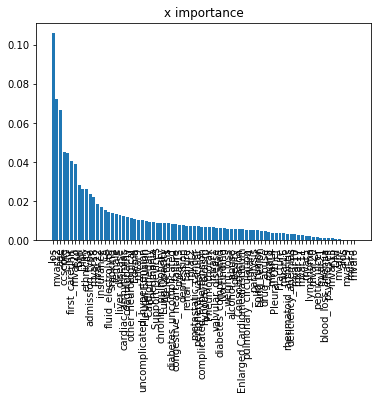

In [109]:
#Build you model and evaluate it on your validation set
randomForest = RandomForestClassifier(random_state=0,n_jobs=-1)
model = randomForest.fit(x_training_list,y_training_list)

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

L = x_train.columns.tolist()
names = [L[i] for i in indices]

plt.figure()
plt.title('x importance')
plt.bar(range(82),importances[indices])
plt.xticks(range(82),names,rotation= 90)
plt.show()
# 下圖是每個特徵在隨機森林裡面的重要程度

In [110]:
# 選出前十個最重要的特徵 調整資料 用來再重新訓練一次
mostImportances = []
for i in range(0,10):
 mostImportances.append(names[i])

x_training_data = pd.DataFrame(x_training_data,columns=mostImportances)
x_testing_data = pd.DataFrame(x_testing_data,columns=mostImportances)

x_training_list = np.array(x_training_data)#np.ndarray()
x_training_list=x_training_list.tolist()#list

x_testing_list = np.array(x_testing_data)#np.ndarray()
x_testing_list=x_testing_list.tolist()#list

In [111]:
# 調整後的決策樹
decisionTree = DecisionTreeClassifier(random_state= 0)
decisionTreeModel = decisionTree.fit(x_training_list,y_training_list)
p = decisionTreeModel.predict(x_testing_list)

In [112]:
c = 0
for i  in range(0,len(y_testing_list)):
    if y_testing_list[i]== p[i]:
        c = c+1
print(c/len(y_testing_list))
# 準度有83% 好像不錯

0.8297247455774879


Make the final prediction from your model:

In [113]:
# final prediction
x_test = pd.read_csv('https://raw.githubusercontent.com/aubreyyy24/HW2_data/main/x_test.csv')
x_test_drop = x_test.drop(['indextime','subject_id',], axis=1)

x_test_drop = pd.DataFrame(x_test_drop,columns=mostImportances)

x_test_list= np.array(x_test_drop)#np.ndarray()
x_test_list=x_test_list.tolist()#list

y_pred = decisionTreeModel.predict(x_test_list)

To export your predcition as a CSV file and hand in the CSV on elearn

In [114]:
output_path = STUDENT_ID + '_prediction.csv'

tree_test_pred = pd.DataFrame( {'subject_id': x_test.subject_id,
                  'prediction': y_pred } )
tree_test_pred.to_csv(output_path, index = False)

## Visualizing the Decision Tree *(10% bonus)*

**Note:** Save the visualization result image as **[STUDENT_ID]_visualization.png**

*   Your visualization image of the decision tree can contain **five** layers at most.


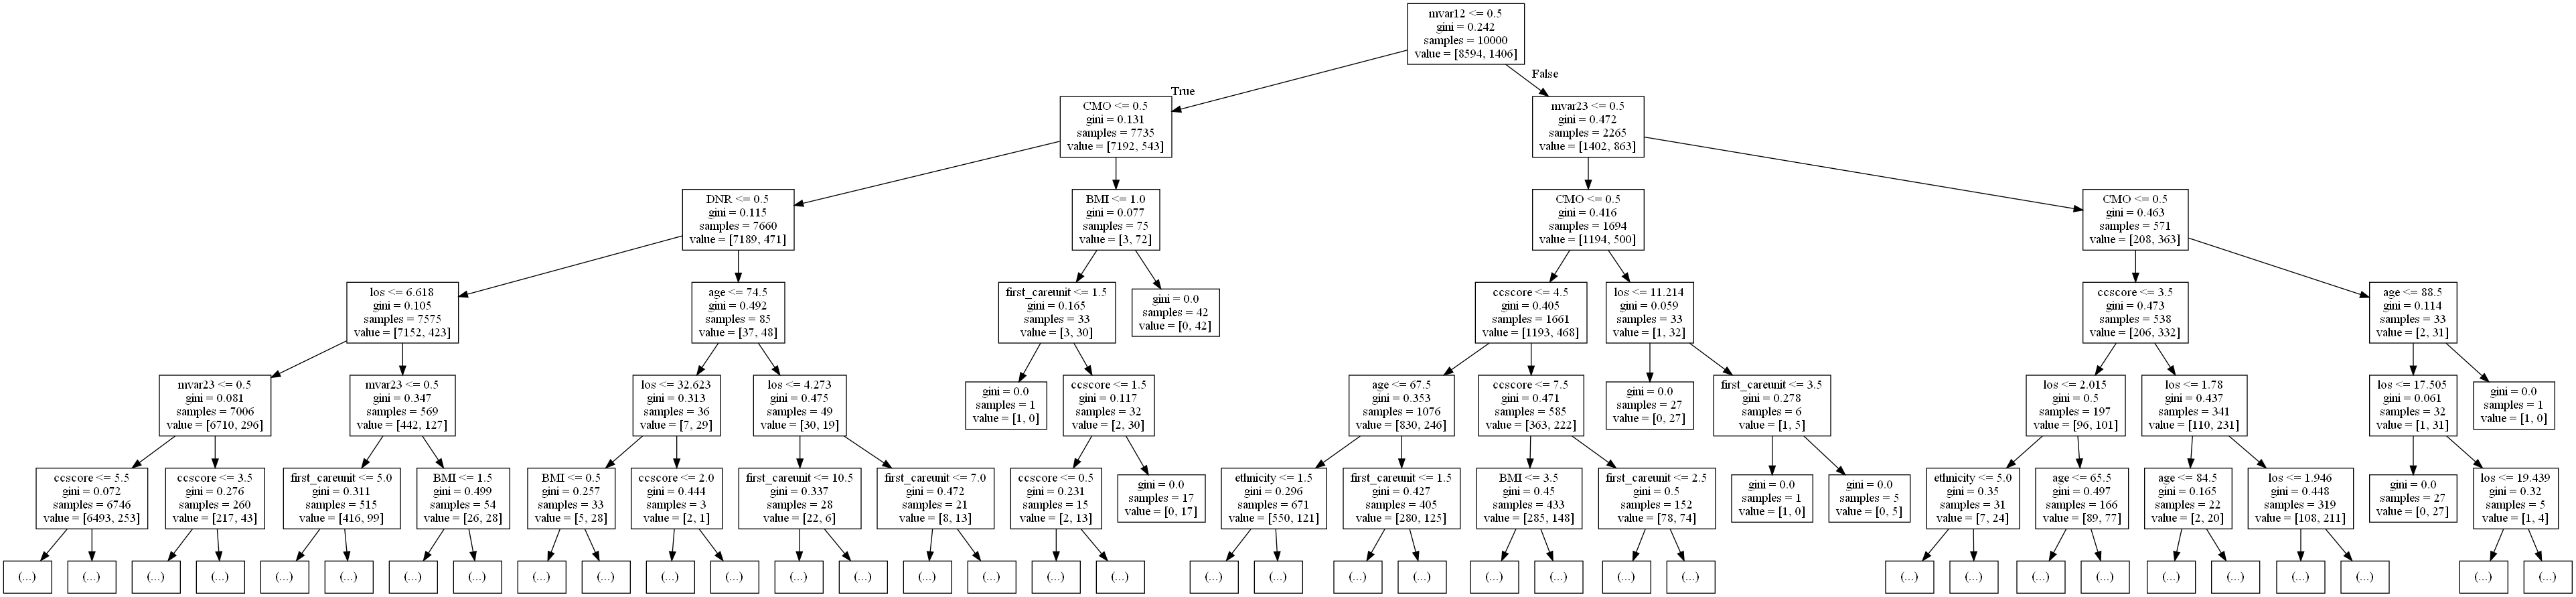

In [115]:
#Decision Tree Visualization
dot_data = tree.export_graphviz(decisionTree,out_file=None, max_depth=5,feature_names=mostImportances,class_names=None)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Report *(10%)*

Report should be submitted as a pdf file! (**[STUDENT_ID]_report.pdf**)

*   List the top 3 splitting features and their thresholds of your model
*   Briefly describe how you build the decision tree
*   Describe if you apply any improvement on your decision tree model
*   If you preprocess the MIMIC data in the second part (selecting features...), describe the work and reasons
*   Summarize your work
*   Do not exceed 2 pages!






# Save the Code File
Please save your code and submit it as an ipynb file! (**[STUDENT_ID]_hw2.ipynb**)